In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Students performance EDA** 
*Javier Hernández - Guatemala*

In [2]:
dtypes={'session_id':'int', 
'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.int32,
    'page':'category',
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
     'text':'category',
     'fqid':'category',
     'room_fqid':'category',
     'text_fqid':'category',
     'fullscreen':'category',
     'hq':'category',
     'music':'category',
     'level_group':'category'}

train = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train.csv', dtype=dtypes)
train_labels = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train_labels.csv')

In [3]:
train.head(10)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991394,-157.314682,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485077,-199.971680,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355133,-168.619919,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733429,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048035,-153.743637,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,NaN,NaN,NaN,0-4


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int64   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           int32   
 6   page            category
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(11), float32(5), int32(2), int64(2)
memory usage: 716.2 MB


In [4]:
train.describe()

,session_id,index,elapsed_time,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
count,1.317421e+07,1.317421e+07,1.317421e+07,1.317421e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06
mean,2.113413e+16,6.526426e+02,3.846817e+06,1.219194e+01,-5.493622e+01,-1.162997e+02,4.581142e+02,3.852362e+02,3.186238e+03
std,5.665220e+14,6.275818e+02,2.701387e+07,6.499188e+00,5.201469e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101031e+16,2.890000e+02,4.394300e+05,6.000000e+00,-3.529377e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02
50%,2.104022e+16,5.960000e+02,1.013425e+06,1.300000e+01,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02
75%,2.110051e+16,8.970000e+02,1.740050e+06,1.800000e+01,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03
max,2.210022e+16,2.047300e+04,1.749293e+09,2.200000e+01,1.261774e+03,5.436164e+02,1.916000e+03,1.439000e+03,2.199078e+08


In [6]:
train.shape

(13174211, 20)

In [7]:
max_elapsed_time = train["elapsed_time"].max()
print("Max elapsed time: ",max_elapsed_time)

Max elapsed time:  1749293395


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0609637d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0608ff410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd060963dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0608ff950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0608ffa90>],
 'means': []}

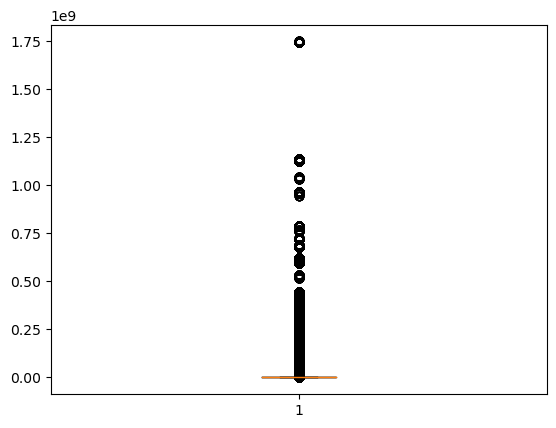

In [10]:
#Now we will try a Box & Wiskers plot
plt.boxplot(train['elapsed_time'])

Distinct Event Names

In [12]:
event_name_unique = train["event_name"].unique()
print(event_name_unique)

['cutscene_click', 'person_click', 'navigate_click', 'observation_click', 'notification_click', ..., 'object_hover', 'map_hover', 'map_click', 'checkpoint', 'notebook_click']
Length: 11
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']


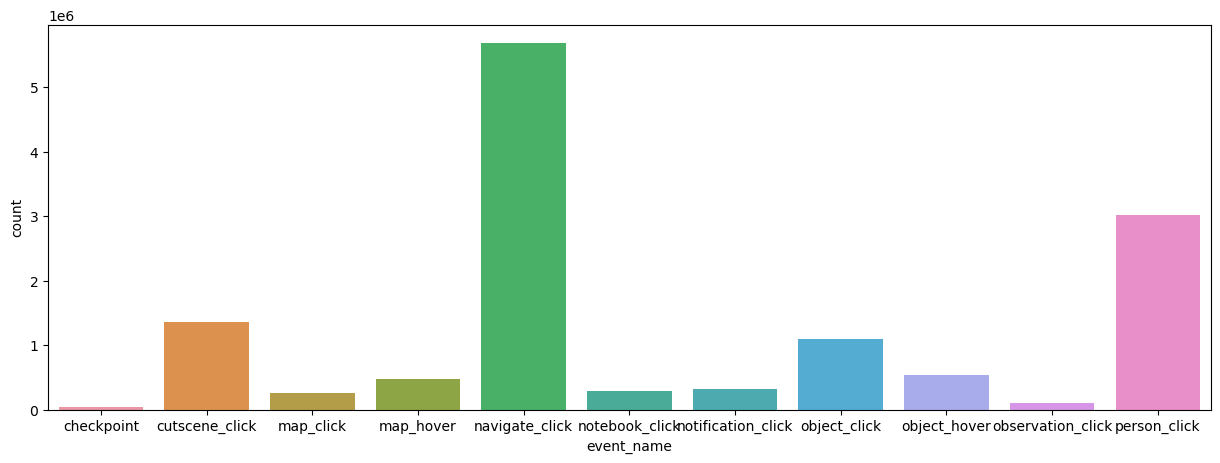

In [17]:
countplt, ax = plt.subplots(figsize = (15,5))
ax =sns.countplot(x = 'event_name', data=train)

Distinct Level Groups

In [13]:
levels_unique = train["level_group"].unique()
print(levels_unique)

['0-4', '5-12', '13-22']
Categories (3, object): ['0-4', '13-22', '5-12']


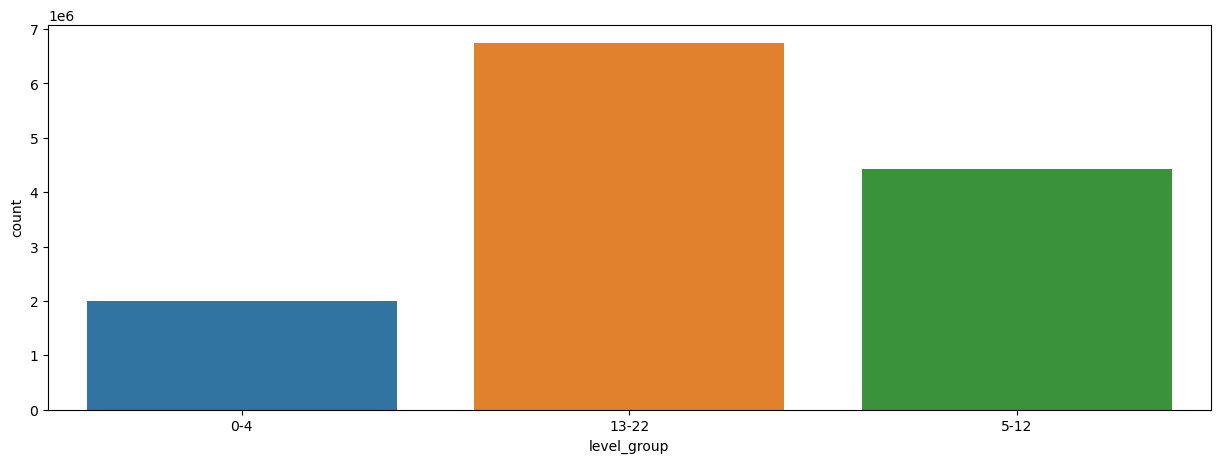

In [16]:
countplt, ax = plt.subplots(figsize = (15,5))
ax =sns.countplot(x = 'level_group', data=train)

In [19]:
gcolor = "#A29FF4"

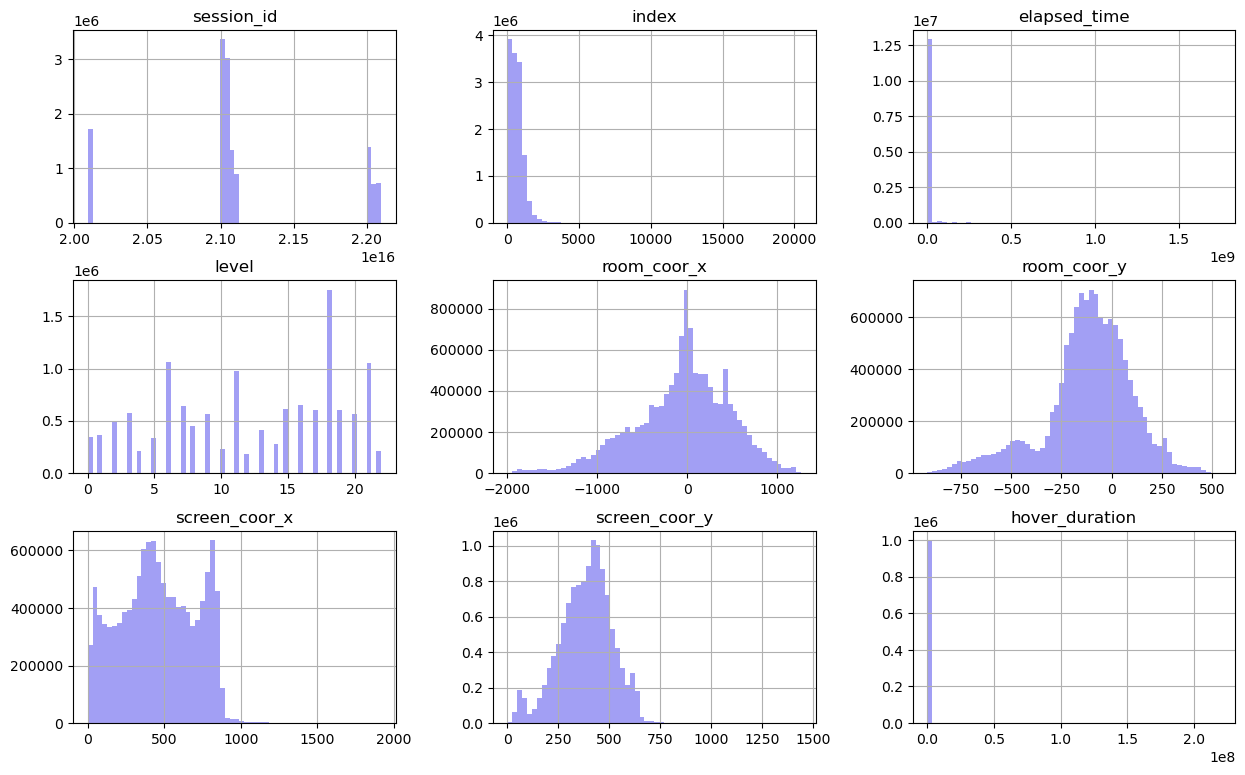

In [20]:
train.hist(bins=60, figsize=(15,9),color=gcolor);
plt.show()

In [21]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

In [ ]:
# Seaborn get a little slow, let's plot some interesting features
train_headers = ['elapsed_time','level','room_coor_x','room_coor_y','screen_coor_x','screen_coor_y','hover_duration']
snsPairGrid(train[train_headers])